In [9]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from scipy.stats import logistic
from sklearn.linear_model import LogisticRegression
# %matplotlib

In [2]:
x = np.array(
    [
        [1,0],
        [2,1],
        [3,1],
        [4,2],
        [5,0]
    ]
)

In [3]:
y = np.array([1,-1,1,1,-1])

In [4]:
w = np.array([1,0])

In [5]:
np.dot(x,w)

array([1, 2, 3, 4, 5])

In [7]:
roc_auc_score(y, -logistic.cdf(np.dot(x,w)))

0.6666666666666666

In [30]:
a,b,_ = roc_curve(y, np.dot(x,w))

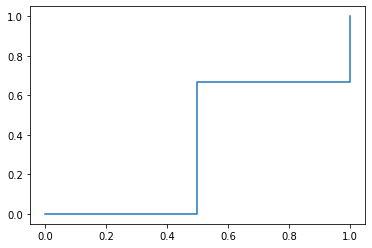

In [31]:
%matplotlib inline
plt.plot(a,b)

In [10]:
lr = LogisticRegression(solver='lbfgs', penalty='none')

In [11]:
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
lr.predict(x)

array([ 1,  1,  1,  1, -1])

In [18]:
np.dot(x, lr.coef_.T) + lr.intercept_ <= 0

array([[False],
       [False],
       [False],
       [False],
       [ True]])

In [19]:
lr.decision_function(x)

array([ 0.59374093,  1.24347248,  0.64150218,  1.29123372, -1.81414027])

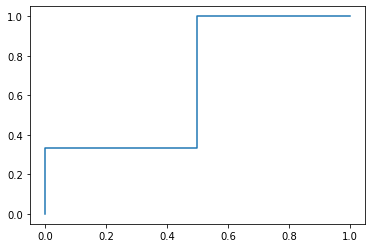

In [26]:
%matplotlib inline
a,b,_ = roc_curve(y, lr.decision_function(x))
plt.plot(a,b)

In [27]:
lr.coef_

array([[-0.6019703 ,  1.25170184]])

In [29]:
roc_auc_score(y, lr.decision_function(x))

0.6666666666666666